# Analysis Challenge Assignment 2
Author: Zecheng Chang

## Assignment Goal:
Build a classifier that can predict on or off-task behavior with the aca2_dataset_training.csv data.

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
%matplotlib inline

### 1. EDA

In [2]:
# import data
data = pd.read_csv('aca2_dataset/aca2_dataset_training.csv')

In [3]:
# preview first couple rows of data
data.head(3)

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
0,34880,A,T8T,2,Z,965160,1,12,224,Wholecarpet,Y,1,2,1,2,1390.500000,0.000664,1027
1,32344,B,T9U,3,Z,11665,1,11,225,Individual,Y,2,3,2,3,890.333333,0.002545,213
2,14774,B,T9Q,0,Z,187441,0,21,374,Smallgroup,Y,3,4,1,2,770.500000,0.001439,2078


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22184 entries, 0 to 22183
Data columns (total 18 columns):
UNIQUEID                 22184 non-null int64
SCHOOL                   22184 non-null object
Class                    22184 non-null object
GRADE                    22184 non-null int64
CODER                    22184 non-null object
STUDENTID                22184 non-null int64
Gender                   22184 non-null int64
OBSNUM                   22184 non-null int64
totalobs-forsession      22184 non-null int64
Activity                 22184 non-null object
ONTASK                   22184 non-null object
TRANSITIONS              22184 non-null int64
NumACTIVITIES            22184 non-null int64
FORMATchanges            22184 non-null int64
NumFORMATS               22184 non-null int64
Obsv/act                 22184 non-null float64
Transitions/Durations    22184 non-null float64
Total Time               22184 non-null int64
dtypes: float64(2), int64(11), object(5)
memory usage:

There are **22184** observations in total
We can notice that there is no missing value

In [5]:
len(data['UNIQUEID'].unique())

22184

There is no duplicate obervation based on the UNIQUEID

In [6]:
# overview of the numeric variables
data.describe()

,UNIQUEID,GRADE,STUDENTID,Gender,OBSNUM,totalobs-forsession,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
count,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000
mean,28256.558556,2.056076,506965.948521,0.506446,9.621168,170.693608,2.383114,3.383114,1.534304,2.534304,973.525214,0.003159,774.587811
std,8030.006461,1.503220,283257.429497,0.499970,5.702232,105.788938,1.315163,1.315163,1.229399,1.229399,454.538354,0.010309,665.169774
min,14400.000000,0.000000,1123.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,387.000000,0.000000,0.000000
25%,21276.750000,1.000000,264220.000000,0.000000,5.000000,82.000000,1.000000,2.000000,1.000000,2.000000,721.200000,0.000839,252.000000
50%,28263.500000,2.000000,514301.000000,1.000000,9.000000,165.000000,2.000000,3.000000,1.000000,2.000000,876.250000,0.001513,586.500000
75%,35231.250000,4.000000,743450.000000,1.000000,14.000000,248.000000,3.000000,4.000000,2.000000,3.000000,1106.750000,0.003268,1121.000000
max,42130.000000,4.000000,999979.000000,1.000000,32.000000,511.000000,6.000000,7.000000,5.000000,6.000000,2735.000000,0.666667,3554.000000


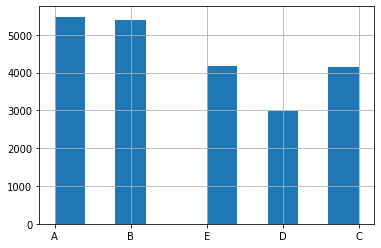

In [7]:
data['SCHOOL'].hist();

School D has less observations comparing to other schools

In [8]:
data.pivot_table(index='Class', columns='SCHOOL', aggfunc='size', fill_value=0)

SCHOOL,A,B,C,D,E
Class,,,,,
T0Q,0,0,748,0,0
T0S,0,0,979,0,0
T0T,0,0,747,0,0
T0U,0,0,764,0,0
T0V,0,0,908,0,0
T6Q,0,0,0,0,1027
T6S,0,0,0,0,1001
T6T,0,0,0,0,1008
T6V,0,0,0,0,1138


Each class is unique for a school, which means there are no shcools sharing the same class room names

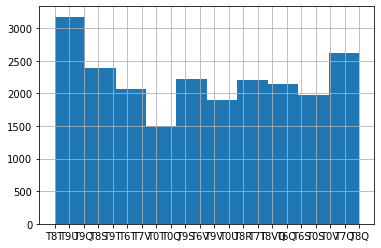

In [9]:
data['Class'].hist();

Each class room has pretty much the same number of observations, ranging from 1500 - 3000+, but mostly are around 2000

In [10]:
data['GRADE'].value_counts()

4    6457
2    5003
0    4548
1    4375
3    1801
Name: GRADE, dtype: int64

Grade 3 has much less obeservations

In [11]:
data['STUDENTID'].value_counts()

224646    194
793647    149
582042    145
117810    130
638337    111
         ... 
273100      7
351358      6
999255      6
253292      6
35747       5
Name: STUDENTID, Length: 1226, dtype: int64

There are 1226 students participating in experiment and student 224646 contributed the most observations, 194, and 35747 contributed the least, 5.

In [12]:
data['Gender'].value_counts()

1    11235
0    10949
Name: Gender, dtype: int64

There are slightly more boys than girls, not a problem.

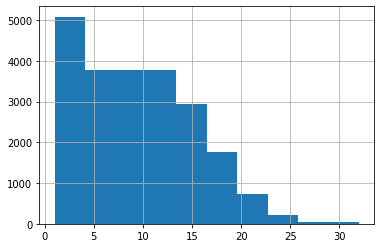

In [13]:
data['OBSNUM'].hist();

In [14]:
#data[(data['STUDENTID'] == 224646) & (data['Activity'] =='Wholedesks')][['STUDENTID','Activity','OBSNUM']].sort_values(by='OBSNUM')

In [15]:
data['Activity'].value_counts()

Wholedesks     7144
Wholecarpet    5635
Individual     4548
Smallgroup     4326
Testing         414
Dancing         117
Name: Activity, dtype: int64

There are much less observations in `Tesing` and `Dacing`, which may lead to a unbalacing problem

In [16]:
data['ONTASK'].value_counts()

Y    14938
N     7246
Name: ONTASK, dtype: int64

The off-task observations are 2 times more than on task observations, which may lead to a unbalacing problem as well.

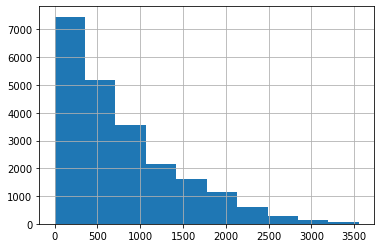

In [17]:
data['Total Time'].hist();

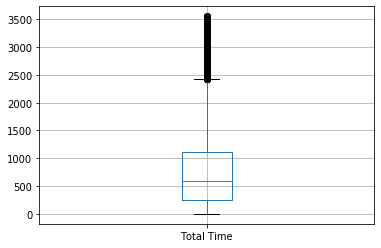

In [18]:
data.boxplot('Total Time');

In [19]:
data['Total Time'].value_counts()

0       173
210      33
52       32
192      32
234      32
       ... 
2818      1
2802      1
2722      1
2690      1
2138      1
Name: Total Time, Length: 2764, dtype: int64

There are 173 observations are recorded as 0 second, I think it's better to remove later for the model training.

In [20]:
data['NumACTIVITIES'].value_counts()

3    6687
4    5918
2    4077
5    2319
1    1547
6    1430
7     206
Name: NumACTIVITIES, dtype: int64

In [21]:
data['TRANSITIONS'].value_counts()

2    6687
3    5918
1    4077
4    2319
0    1547
5    1430
6     206
Name: TRANSITIONS, dtype: int64

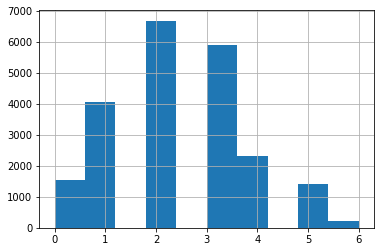

In [22]:
data['TRANSITIONS'].hist()

In [23]:
data['NumFORMATS'].value_counts()

2    7863
3    5433
1    4550
4    2572
5    1238
6     528
Name: NumFORMATS, dtype: int64

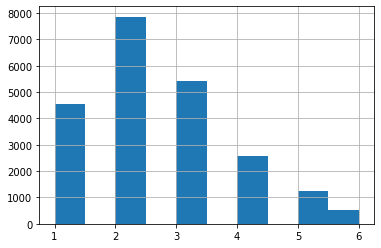

In [24]:
data['NumFORMATS'].hist()

In [25]:
data['FORMATchanges'].value_counts()

1    7863
2    5433
0    4550
3    2572
4    1238
5     528
Name: FORMATchanges, dtype: int64

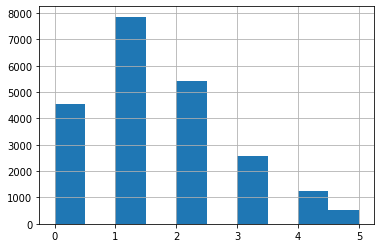

In [26]:
data['FORMATchanges'].hist();

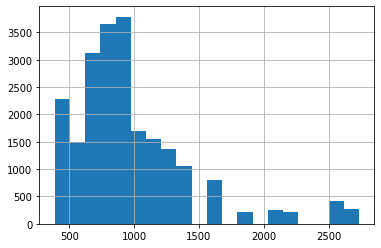

In [27]:
data['Obsv/act'].hist(bins=20);

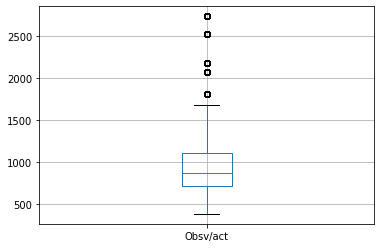

In [28]:
data.boxplot('Obsv/act');

There are some outliers, considering remove them from the dataset

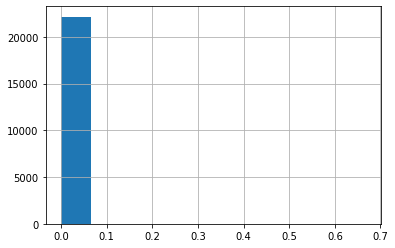

In [29]:
data['Transitions/Durations'].hist();

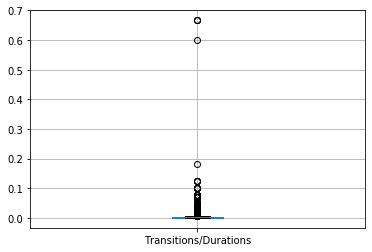

In [30]:
data.boxplot('Transitions/Durations');

Extreme outliers are noticed.

### 2. Preparing the data for model

There are some varibales are not necessary for our model, we need remove them.
The variables that I think are unnecessary:
1. UNIQUEID
2. SCHOOL
3. Class
4. StudentID
5. CODER

In [31]:
df = data.drop(['UNIQUEID','SCHOOL','Class','STUDENTID','CODER'],axis=1)

Remove the outliers found above

In [32]:
df = df[df['Total Time'] != 0].copy()

In [33]:
df['Obsv/act'].describe()

count    22011.000000
mean       974.671395
std        455.127942
min        387.000000
25%        721.200000
50%        876.250000
75%       1106.750000
max       2735.000000
Name: Obsv/act, dtype: float64

In [34]:
OA_outliers = 1106.75 + 1.5*(1106.75-721.20)
OA_outliers

1685.0749999999998

In [35]:
df = df[df['Obsv/act'] <= OA_outliers].copy()

Outliers in `Obsv/act` are removed

In [36]:
df['Total Time'].describe()

count    20643.000000
mean       750.513055
std        652.344993
min          2.000000
25%        247.000000
50%        563.000000
75%       1068.000000
max       3554.000000
Name: Total Time, dtype: float64

In [37]:
tt_outliers = 1068 + 1.5 * (1068 - 247)
tt_outliers

2299.5

In [38]:
df = df[df['Total Time'] <= tt_outliers].copy()

In [39]:
data['Transitions/Durations'].describe()

count    22184.000000
mean         0.003159
std          0.010309
min          0.000000
25%          0.000839
50%          0.001513
75%          0.003268
max          0.666667
Name: Transitions/Durations, dtype: float64

In [40]:
td_outliers = 0.003268 + 1.5 * (0.003268-0.000839)
td_outliers

0.0069115

In [41]:
df = df[df['Transitions/Durations'] <= td_outliers].copy()

### 3. Start building models

Since we are classify 0/1, I plan to use Logistic Regression and Random Forest. These 2 algorithms can both be easily interpreted, and interpretations are need for future use for this purpose of this research.

In oder to user Logistic Regression, I need to check the correlation between variables

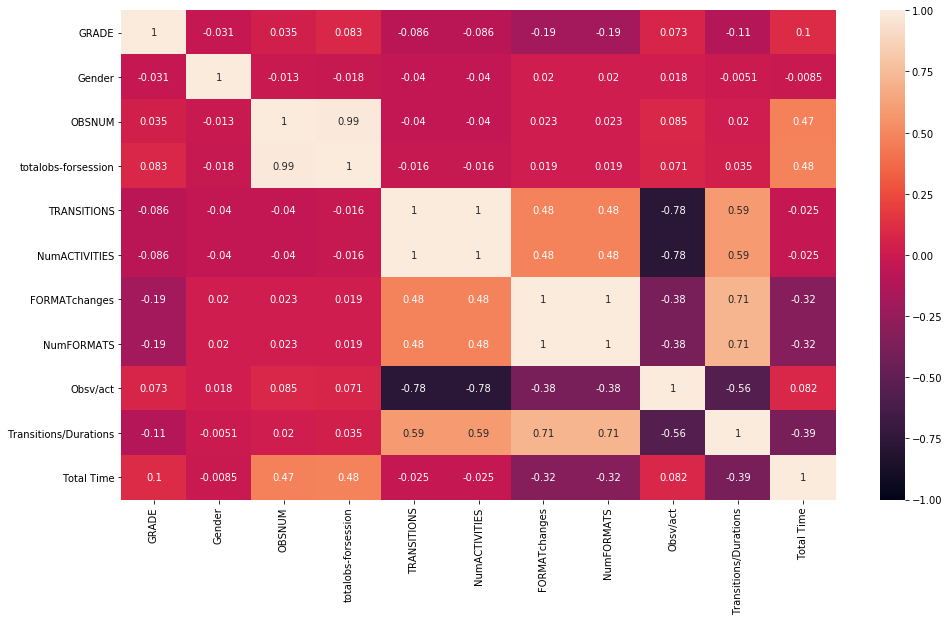

In [42]:
corr = df.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(corr, 
            vmax=1,
            vmin=-1,
            annot=True);

In [43]:
# remove variables that are highly correlated with others

df.drop(['totalobs-forsession','NumACTIVITIES','NumFORMATS'],axis=1,inplace=True)

#### 3.1 Random Forest

In [44]:
df_rf = df.copy()

In [45]:
X_rf = df_rf.drop('ONTASK', axis=1)
y_rf = df['ONTASK']

In [46]:
# split train, test datasets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.1,random_state=33)

In [47]:
cat_trans = make_column_transformer(
            (OneHotEncoder(), ['Activity']),
            remainder="passthrough")

In [48]:
# one_hot = OneHotEncoder()
# norm_num = MinMaxScaler()
rf = RandomForestClassifier(random_state=33)

pipe = Pipeline(steps=[('cat_trans',cat_trans),('rf',rf)])

#pipe.get_params()

In [49]:
gird_params_rf = [{
    'rf__max_depth':[10],
    'rf__min_samples_leaf':[2],
    'rf__min_samples_split':[10],
    'rf__n_estimators':[200]}
]

In [50]:
search = GridSearchCV(pipe, gird_params_rf, n_jobs=-1,cv=10,verbose=2)
search.fit(X_train_rf,y_train_rf)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('cat_trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['Activity'])])),
                                       ('rf',
                                        RandomForestClassifier(random_state=33))]),
             n_jobs=-1,
             param_grid=[{'rf__max_depth': [10], 'rf__min_samples_leaf': [2],
                          'rf__min_samples_split': [10],
                          'rf__n_estimators': [200]}],
             verbose=2)

In [51]:
#search.best_estimator_

In [52]:
y_preds_rf = search.predict(X_test_rf)

rf_accuracy_score = accuracy_score(y_test_rf, y_preds_rf)
print(f"The accuracy of the model is {round(rf_accuracy_score,3)*100} %")

The accuracy of the model is 69.8 %


In [53]:
y_test_rf.value_counts()

Y    1231
N     556
Name: ONTASK, dtype: int64

In [54]:
1481/(1481+721)

0.6725703905540418

This model is only 1% better than just guessing the depedent varibales to be all 'Y'

### Validation dataset

In [55]:
val_data = pd.read_csv('aca2_dataset/aca2_dataset_validation.csv')
val_data.drop(['totalobs-forsession','NumACTIVITIES','NumFORMATS'],axis=1,inplace=True)
val_data.drop(['UNIQUEID','SCHOOL','Class','STUDENTID','CODER'],axis=1, inplace=True)

In [56]:
X = val_data.drop(['ONTASK'], axis=1)

In [57]:
y = val_data['ONTASK']

In [58]:
val_preds = search.predict(X)

ValueError: Found unknown categories ['Testing', 'Dancing'] in column 0 during transform

In [59]:
accuracy_score(y, val_preds)

NameError: name 'val_preds' is not defined

In [155]:
y.value_counts()

Y    3698
N    1849
Name: ONTASK, dtype: int64

In [156]:
3689/(3689+1849)

0.6661249548573492

### 5. Interpreting model result

I think I have failed this model because I don't have a good understanding on this dataset, the importance of the features won't give us much usefull insights due to the poor result.